# Image processing lab 
## Session 1: Initiation

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### I. Image formats

#### 1. Reading the image

In [5]:
img = cv2.imread('dataset/image2.jpg')

#### 2. Displaying the image
As `cv2.imshow` causes jupyter notebooks to crash, I've decided to `matplotlib.pyplot.imshow` to display the images.
In order to do so, we should be aware that images in openCV are stored in BGR format by default (as opposed to other libraries, which use the RGB format)

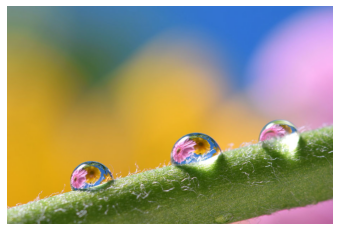

(611, 916, 3)

In [15]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
img.shape

#### 3. RGB Format
This is a color model display format that uses the three primary colors (blue, red and green) to create an image. Each color can have up to 255 gradations. Concretely, an image is a matrix with depth of 3 containing the values for each color.

#### 4. HSL/HSV Format

From [Wikipedia](https://en.wikipedia.org/wiki/HSL_and_HSV):
> HSL (for hue, saturation, lightness) and HSV (for hue, saturation, value; also known as HSB, for hue, saturation, brightness) are alternative representations of the RGB color model, designed in the 1970s by computer graphics researchers to more closely align with the way human vision perceives color-making attributes. In these models, colors of each hue are arranged in a radial slice, around a central axis of neutral colors which ranges from black at the bottom to white at the top. 

#### Transforming RGB to HLS

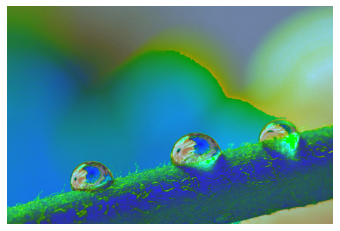

In [7]:
image_hsl = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.axis('off') # hides gridlines
plt.imshow(image_hsl)
plt.show()

#### 5. Grayscale Format
images are treated as two dimensional matrices with values ranging from 0 for darkest to 256 for brightest

#### Transforming RGB to Grayscale
the additional argument **cmap** in `plt.imshow()` is needed to display grayscale images

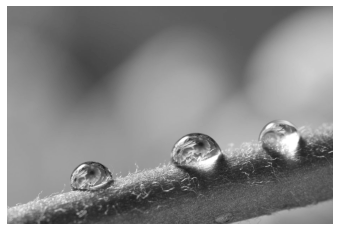

In [8]:
image_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off') # hides gridlines
plt.imshow(image_gs, cmap='gray') 
plt.show()

#### 6. Binary Format
Images in this format are similar to those in the Grayscale format. With the exception that contain pixel with grayscale values of **either** 0 **or** 256. The choice of whether assigning 0 or 256 to a given pixel is done by comparing to an arbitrary Threshold.

In [9]:
def display_binary_image(threshold):
    image_bw = cv2.threshold(image_gs, threshold, 255, cv2.THRESH_BINARY)[1]
    plt.axis('off') # hides gridlines
    plt.imshow(image_bw, cmap='gray') 
    plt.show()

##### For threshold value 110

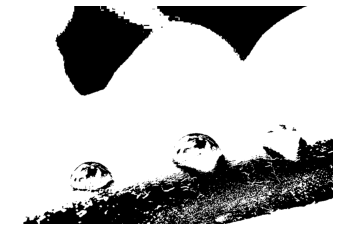

In [10]:
display_binary_image(110)

##### For threshold value 205

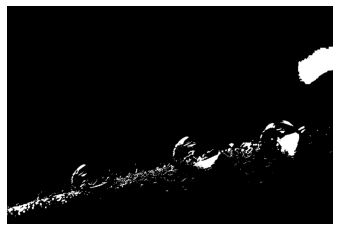

In [11]:
display_binary_image(205)

### II. Image operations

Image processing consists of performing mathematical transformations on images with the aim of improving their quality or extracting information from them. Arithmetic operations between digital images require image size normalization. 

In [12]:
# img is already imported, importing second image
img2 = cv2.imread('dataset/image1.jpg')

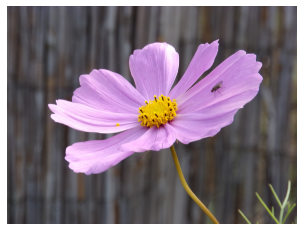

(3456, 4608, 3)


In [14]:
image2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(image2_rgb)
plt.axis('off')
plt.show()

In [17]:
print(f"image 1 size: {img.shape}\nimage 2 size: {img2.shape}")

image 1 size: (611, 916, 3)
image 2 size: (3456, 4608, 3)


#### 1. Resizing the second image

The method `cv2.resize` is used to resize the second image. Note that the resizing should take an image in BGR format as a parameter

In [62]:
img2bgr = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
resizedImgBGR = cv2.resize(img2bgr, img.shape[:2][::-1])

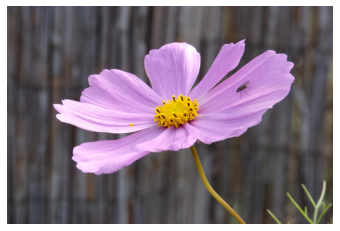

size: (611, 916, 3)


In [63]:
resizedImg = cv2.cvtColor(resizedImg, cv2.COLOR_BGR2RGB)
plt.imshow(resizedImg)
plt.axis('off')
plt.show()
print("size:", resizedImg.shape)

#### 2. Image addition

[uni-wuerzburg.de](https://wuecampus2.uni-wuerzburg.de/moodle/mod/book/view.php?id=958001&chapterid=10068) on image addition:
> The addition of two images stacks the value of every pixel in image A with the corresponding pixel of image B. Consequently, the image gets brighter. Depending on the maximal allowed pixel value that is used, this operation might result in saturated pixels of the new image, i.e. white pixels that have reached the maximum value. This will lead to information loss and should be avoided if possible. The whole resulting image can for example be re-normalized, so that the brightest pixel equals the maximum allowed value and all other pixels are scaled accordingly. The example below is not adjusted for this case.

The following example uses this formula for image addition: 

$$Res(i,j) = 0.5 * A(i,j) + 0.5 * B(i,j)$$

Again, here are the pictures we will be using as an example:

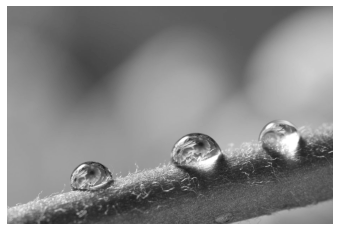

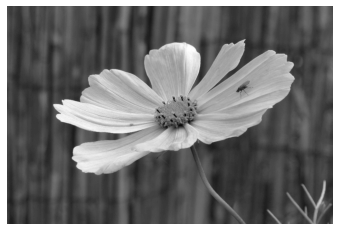

In [67]:
i1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
i2 = cv2.cvtColor(resizedImg, cv2.COLOR_BGR2GRAY)

plt.imshow(i1, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(i2, cmap='gray')
plt.axis('off')
plt.show()

And here is their sum

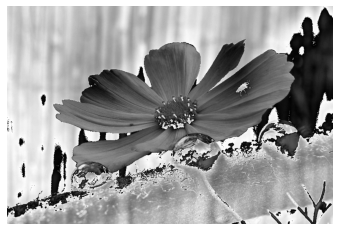

In [70]:
plt.imshow(0.5 * (i1 + i2), cmap='gray')
plt.axis('off')
plt.show()

#### 2. Image substraction

[uni-wuerzburg.de](https://wuecampus2.uni-wuerzburg.de/moodle/mod/book/view.php?id=958001&chapterid=10068) on image substraction:
> Subtracting two images works analogously. In a similar way, the resulting values may lie outside the allowed range of pixel values. This will be the case when one image is subtracted from another with lower pixel values. Here, it is advantageous to add a certain constant value to the equation (the whole image). The example below shows what happens when two images that are in parts almost identical get subtracted from one another. We add the constant value of 150 to every pixel of image A and then perform the subtraction by image B. Subtle differences in the background can be seen as soft lines and shapes in the resulting image. This is expected for nearly identical images with e.g. slightly different exposure times. The darker areas of the cup in the middle even become a bit darker (value 0) since they (very dark tones plus 150) are then indeed over-subtracted. The gray lines across the cup are the result of the subtraction of a light tone (dark cup in image A + 150) with a dark tone (dark lines in image B). The cup on the right side in the resulting image also features gray lines, which are brighter compared to the cup in the middle since the cup is brighter itself.

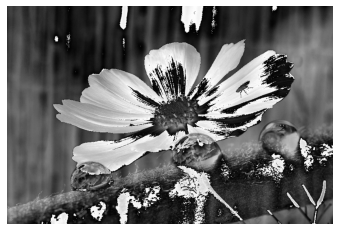

In [71]:
plt.imshow(i1 - i2, cmap='gray')
plt.axis('off')
plt.show()

#### 3. Scalar multiplication

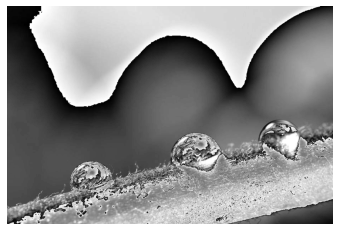

In [72]:
cst = 2
plt.imshow(i1 * cst, cmap='gray')
plt.axis('off')
plt.show()

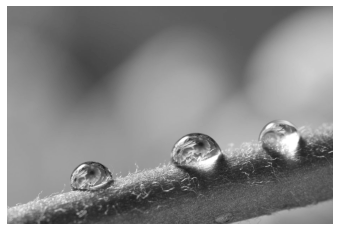

In [78]:
cst = 0.1
plt.imshow(i1 * cst, cmap='gray')
plt.axis('off')
plt.show()

### III. Histogram equalization